In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import datetime
import matplotlib.pyplot as plt

Importation du csv dans un dataframe

In [91]:
df_ = pd.read_csv('./online_retail_II.csv')
df = df_.copy()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Différentes remarques sur ces informations :
- La colonne 'InvoiceDate' est de type objet au lieu d'être en date.  
- La plupart des colonnes ont 1067371 lignes à l'exception de 'Description' et 'Customer ID', il y a donc des informations manquantes. La colonne 'Description' n'est pas vraiment utile, mais celle des 'Customer ID' étant primordiale nous allons supprimer les lignes où l'ID manque.  
- La colonne 'Customer ID' est de type float64 alors qu'un type int64 est certainement suffisant.  
- Il n'y a pas de colonne pour décrire le prix total en fonction de la quantité d'articles achetée, ce qui pourrait être une information intéressante.  

In [93]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

Voyons maintenant s'il y a des doublons, s'il y en a nous les supprimerons

In [94]:
df[df.duplicated()].shape

(34335, 8)

In [95]:
df = df.drop_duplicates(keep='first')
df[df.duplicated()].shape

(0, 8)

Suppression des lignes où le Customer ID est manquant et conversion du type en int64  
Création d'une colonne 'Total' pour avoir le prix selon la quantité achetée

In [96]:
df = df[df['Customer ID'].notna()]
df['Customer ID'] = df['Customer ID'].astype(np.int64)
df['TotalPrice'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


Création d'une colonne "cancelled" (1 ou 0) pour pouvoir compter le nombre de retours effectués par chaque client au moment du groupby

In [97]:
df["cancelled"] = np.where(df["Quantity"] < 0, 1, 0)

In [98]:
# Trier le DataFrame par la colonne "Quantity" de manière décroissante
df_sorted = df.sort_values(by="Quantity", ascending=True)

# Afficher le DataFrame trié
df_sorted.head(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,cancelled
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,-168469.60,1
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.60,1
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom,-280.80,1
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277,France,-570.24,1
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,2010-09-28 11:02:00,0.13,14277,France,-911.04,1
...,...,...,...,...,...,...,...,...,...,...
680600,C549968,22151,PLACE SETTING WHITE HEART,-432,2011-04-13 14:24:00,0.36,14064,United Kingdom,-155.52,1
252978,C513771,22332,SKULLS PARTY BAG + STICKER SET,-432,2010-06-28 13:49:00,1.45,16754,United Kingdom,-626.40,1
814595,C562221,22151,PLACE SETTING WHITE HEART,-432,2011-08-03 14:22:00,0.36,16525,United Kingdom,-155.52,1
103623,C499282,21166,COOK WITH WINE METAL SIGN,-432,2010-02-25 18:55:00,1.69,16684,United Kingdom,-730.08,1


Sauvegarde du dataframe (pour l'utiliser pour faire l'analyse RFM et clustering)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  int64         
 7   Country      797885 non-null  object        
 8   TotalPrice   797885 non-null  float64       
 9   cancelled    797885 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 67.0+ MB


In [100]:
df.to_csv('clean_online_retail.csv', index=False)

# Analyse des performances de l'entreprise et des tendances globales
## Analyse produits

Il peut être intéressant de voir quel est le produit qui a le prix le plus élevé

In [101]:
most_expensive = df.loc[df['Price'] == df['Price'].max()]
most_expensive 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,cancelled
748142,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098,United Kingdom,-38970.0,1


On remarque ici que le produit en question a une description particulière, et surtout que la quantité est de -1, il s'agit certainement d'un remboursement qui aurait été fait manuellement ('Manuel' en description)?

Maintenant intéressons-nous aux produits avec le prix le plus bas.

In [102]:
least_expensive = df.loc[df['Price'] == df['Price'].min()]
least_expensive = least_expensive.groupby(['Description', 'Price'], as_index=False)['Quantity'].agg('sum')
least_expensive 

,Description,Price,Quantity
0,FLAMINGO LIGHTS,0.0,24
1,OVAL WALL MIRROR DIAMANTE,0.0,1
2,36 FOIL STAR CAKE CASES,0.0,144
3,6 RIBBONS EMPIRE,0.0,12
4,ADVENT CALENDAR GINGHAM SACK,0.0,4
...,...,...,...
56,SET/5 RED SPOTTY LID GLASS BOWLS,0.0,2
57,TV DINNER TRAY DOLLY GIRL,0.0,9
58,This is a test product.,0.0,10
59,VINTAGE CREAM CAT FOOD CONTAINER,0.0,1


On peut voir ici qu'il y a 61 produits dont le prix est affiché à 0, voyons plutôt ce qu'on trouve comme produit si on fait abstraction de ceux qui sont gratuits

In [103]:
df_non_zero_price = df.loc[df['Price'] != 0]
least_expensive_not_null = df_non_zero_price.loc[df_non_zero_price['Price'] == df_non_zero_price['Price'].min()]
least_expensive_not_null = least_expensive_not_null.groupby(['Description', 'Price'], as_index=False)['Quantity'].agg('sum')
least_expensive_not_null

,Description,Price,Quantity
0,Bank Charges,0.001,1
1,PADS TO MATCH ALL CUSHIONS,0.001,17


Cherchons maintenant après les 10 produits les plus vendus et les 10 produits sur lesquels il y a le plus de retours.  
Nous prenons le temps de retirer les produits qui ont pour description 'CRUK Commission' (une organisation de recherches sur les cancers) ainsi que 'Discount'.

In [104]:
df_products = df.groupby(['Description'], as_index=False)['Quantity'].agg('sum')
df_products = df_products.loc[~df_products['Description'].isin(['CRUK Commission', 'Discount'])]
df_products_asc = df_products.sort_values('Quantity').head(10)
df_products_asc['Quantity'] = df_products_asc['Quantity'] * (-1)
df_products_desc = df_products.sort_values('Quantity', ascending=False).head(10)

In [105]:
fig = go.Figure(data=[
    go.Bar(name='Produits les plus vendus', 
           x=df_products_desc['Description'].astype(str), 
           y=df_products_desc['Quantity'],
           marker_opacity=1,
           marker={'color': df_products_desc['Quantity'],
                   'colorscale': 'Rainbow'})
    ])

fig.update_layout(title='Produits les plus vendus',
                  title_x=0.45,
                  xaxis_title="Produits",
                  yaxis_title="Quantité vendue",
                  plot_bgcolor='white')
fig.show()

In [106]:
fig = go.Figure(data=[
    go.Bar(name='Produits avec le plus de retours', 
           x=df_products_asc['Description'].astype(str), 
           y=df_products_asc['Quantity'],
           marker_opacity=1,
           marker={'color': df_products_desc['Quantity'],
                   'colorscale': 'Rainbow'}
          )
    ])

fig.update_layout(title='Produits avec le plus de retours',
                  title_x=0.45,
                  title_y=0.97,
                  xaxis_title="Produits",
                  yaxis_title="Quantité retournée",
                  plot_bgcolor='white')
fig.show()

On observe ici que le produit le plus vendu est le 'World War 2 Glider', on voit également que parmis les produits les plus vendus il y a plusieurs boîtes à gâteau.  
A l'inverse ce sont les 'white cherry lights' qui ont fait l'objet du plus grand nombre de retours, parmis les produits les plus retournés on peut voir qu'il y a beaucoup de décorations.

## Analyse clients
Cherchons maintenant après les 10 clients qui ont dépensé le plus au cours de ces deux ans, ainsi que les 10 qui ont dépensé le moins

In [107]:
df_customers = df.groupby(['Customer ID', 'Country'], as_index=False)['TotalPrice'].agg('sum')
df_customers_asc = df_customers.sort_values('TotalPrice').head(10)
df_customers_desc = df_customers.sort_values('TotalPrice', ascending=False).head(10)

In [108]:
fig = go.Figure(data=[
    go.Bar(name='Clients qui ont le plus acheté', 
           x=df_customers_desc['Customer ID'].astype(str), 
           y=df_customers_desc['TotalPrice'],
           marker_opacity=1,
           hovertext=df_customers_desc['Country'],
           marker={'color': df_customers_desc['TotalPrice'],
                   'colorscale': 'Rainbow'})
    ])

fig.update_layout(title='Clients qui ont le plus acheté',
                  title_x=0.45,
                  xaxis_title="Customer ID",
                  yaxis_title="Montant Total",
                  plot_bgcolor='white')
fig.show()

On peut voir que le client avec l'ID 18102 est celui qui a dépensé le plus ces deux dernières années avec près de 600k, on sait également qu'il vient du Royaume Uni.  
Parmis les 10 meilleurs clients, la plupart viennent du Royaume Uni ou d'Irlande

In [109]:
fig = go.Figure(data=[
    go.Bar(name='Clients qui ont le moins acheté', 
           x=df_customers_asc['Customer ID'].astype(str), 
           y=df_customers_asc['TotalPrice'],
           marker_opacity=1,
           hovertext=df_customers_desc['Country'],
           marker={'color': df_customers_desc['TotalPrice'],
                   'colorscale': 'Rainbow'}
          )
    ])

fig.update_layout(title='Clients qui ont le moins acheté',
                  title_x=0.45,
                  xaxis_title="Customer ID",
                  yaxis_title="Montant Total Remboursé",
                  plot_bgcolor='white')
fig.show()

On peut voir ici que le client avec l'ID 17399 est celui qui a reçu le plus gros remboursement, pour près de 25k.  
Tout comme pour les meilleurs clients, les moins bons ont l'air de venir pour la plupart du Royaume-Uni ainsi que de l'Irlande.

On va voir les clients qui ont annulé le plus de commandes (on ne s'interesse pas ici à la quantité de produit par commande annulée)

In [110]:
# Groupby par client avec la somme des valeurs dans la colonne "cancelled" et le nombre total d'invoices
df_cancellation = df.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})

# Renommer les colonnes
df_cancellation = df_cancellation.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})

df_cancellation["CancellationPercentage"] = (df_cancellation["TotalCancelled"] / df_cancellation["TotalInvoices"]) * 100


# Afficher le DataFrame résultant
print(df_cancellation.sort_values(by= "TotalCancelled", ascending=False))


             TotalCancelled  TotalInvoices  CancellationPercentage
Customer ID                                                       
14911                   365          11444                3.189444
15311                   273           4579                5.962000
17511                   209           2077               10.062590
17841                   203          12638                1.606267
13798                   191            912               20.942982
...                     ...            ...                     ...
15920                     0            107                0.000000
15921                     0             79                0.000000
13793                     0              7                0.000000
15923                     0             21                0.000000
13469                     0              6                0.000000

[5942 rows x 3 columns]


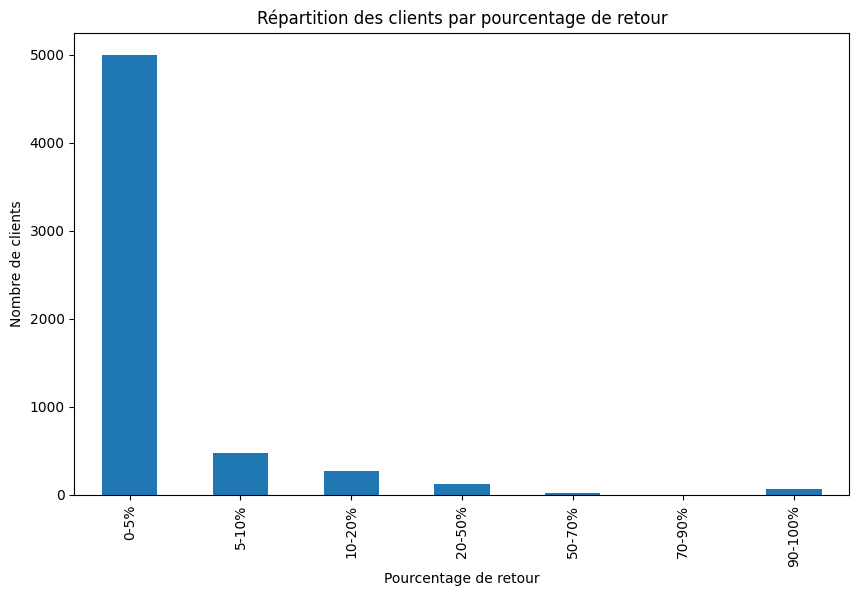

In [111]:
# Définir les intervalles de catégories
intervals = [0, 5, 10, 20, 50, 70, 90, 100]
labels = ['0-5%', '5-10%', '10-20%', '20-50%', '50-70%', '70-90%', '90-100%']

# Créer une nouvelle colonne avec les catégories de pourcentage de retour
df_cancellation['ReturnCategory'] = pd.cut(df_cancellation['CancellationPercentage'], bins=intervals, labels=labels, right=True, include_lowest=True)

# Compter le nombre de clients par catégorie de pourcentage de retour
return_category_counts = df_cancellation['ReturnCategory'].value_counts()

# Réorganiser les valeurs en fonction de l'ordre des labels
return_category_counts = return_category_counts.reindex(labels)

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
return_category_counts.plot(kind='bar')
plt.xlabel('Pourcentage de retour')
plt.ylabel('Nombre de clients')
plt.title('Répartition des clients par pourcentage de retour')
plt.show()


La feature "CancellationPercentage" peut-être interessante à conserver dans le clustering

Il pourrait être intéressant de voir maintenant quels sont les pays dont les clients ont le plus et le moins acheté.

In [112]:
df_countries_purchase = df.groupby(['Country'], as_index=False)['TotalPrice'].agg('sum')
df_countries_purchase_asc = df_countries_purchase.sort_values('TotalPrice').head(10)
df_countries_purchase_desc = df_countries_purchase.sort_values('TotalPrice', ascending=False).head(10)

In [113]:
fig = go.Figure(data=[
    go.Bar(name="Pays avec le plus d'achats", 
           x=df_countries_purchase_desc['Country'].astype(str), 
           y=df_countries_purchase_desc['TotalPrice'],
           marker_opacity=1,
           marker={'color': df_countries_purchase_desc['TotalPrice'],
                   'colorscale': 'Rainbow'})
    ])

fig.update_layout(title="Pays avec le plus d'achats",
                  title_x=0.45,
                  xaxis_title="Pays",
                  yaxis_title="Montant Total",
                  plot_bgcolor='white')
fig.show()

In [114]:
fig = go.Figure(data=[
    go.Bar(name="Pays avec le moins d'achats", 
           x=df_countries_purchase_asc['Country'].astype(str), 
           y=df_countries_purchase_asc['TotalPrice'],
           marker_opacity=1,
           marker={'color': df_countries_purchase_desc['TotalPrice'],
                   'colorscale': 'Rainbow'}
          )
    ])

fig.update_layout(title="Pays avec le moins d'achats",
                  title_x=0.45,
                  title_y=0.97,
                  xaxis_title="Pays",
                  yaxis_title="Montant Total",
                  plot_bgcolor='white')
fig.show()

On observe ici que le Royaume Uni est loin devant en terme de dépenses, avec près de 13.5M d'achat soit 24x plus que l'Irlande qui arrive en seconde position.  
A l'inverse, l'Arabie Saoudite est le pays où les clients ont le moins dépensé : seulement 131 € sur ces deux dernières années.  
On peut également être étonné du positionnement de la République Tchèque parmis les pays qui ont le moins dépensé alors que la plupart des autres pays d'Europe sont parmis le top 10.

Nous allons maintenant nous intéresser aux pays où le nombre unique de clients est le plus élevé et ceux où il est le moins élevé.

In [115]:
df_countries_customers = df.groupby(['Country'], as_index=False)['Customer ID'].agg({'Customer ID': 'nunique'})
df_countries_customers.rename(columns={'Customer ID': 'Customer Count'}, inplace=True)
df_countries_customers_asc = df_countries_customers.sort_values('Customer Count').head(10)
df_countries_customers_desc = df_countries_customers.sort_values('Customer Count', ascending=False).head(10)

In [116]:
fig = go.Figure(data=[
    go.Bar(name='Pays avec le plus grand nombre de clients uniques', 
           x=df_countries_customers_desc['Country'].astype(str), 
           y=df_countries_customers_desc['Customer Count'],
           marker_opacity=1,
           marker={'color': df_countries_customers_desc['Customer Count'],
                   'colorscale': 'Rainbow'})
    ])

fig.update_layout(title='Pays avec le plus grand nombre de clients uniques',
                  title_x=0.45,
                  xaxis_title="Pays",
                  yaxis_title="Nombre de clients uniques",
                  plot_bgcolor='white')
fig.show()

In [117]:
fig = go.Figure(data=[
    go.Bar(name='Pays avec le plus petit nombre de clients uniques', 
           x=df_countries_customers_asc['Country'].astype(str), 
           y=df_countries_customers_asc['Customer Count'],
           marker_opacity=1,
           marker={'color': df_countries_customers_desc['Customer Count'],
                   'colorscale': 'Rainbow'}
          )
    ])

fig.update_layout(title='Pays avec le plus petit nombre de clients uniques',
                  title_x=0.45,
                  xaxis_title="Pays",
                  yaxis_title="Nombre de clients uniques",
                  plot_bgcolor='white')
fig.show()

On voit ici que dans le Royaume Uni il y a eu 5410 clients uniques au cours de ces 2 dernières années, ce qui est près de 50x plus que l'Allemagne ou la France qui sont à environ 100 clients uniques.  
Pour ce qui est des pays avec le moins de clients uniques, on peut voir que dans ces 10 pays il n'y a eu qu'un seul client.